# Identification
Please indicate your name

Student 1: Andrea Cosentino

Student 2: Andrei Aralov

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>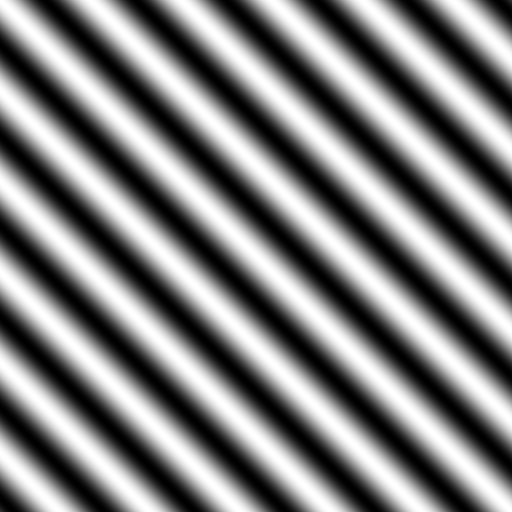</div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [146]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T,np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
get_ipython().magic('matplotlib inline')
    

/tmp/ipykernel_119614/4085892282.py:44: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


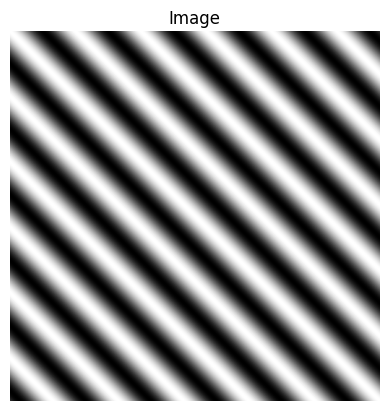

freq: 0.015625
max in u direction is 0.011048543456039804
max in t direction is 0.011048543456039806


In [147]:
sin = sinusoid2d(1,45,512,64,1);
plt.imshow(sin,cmap='gray')
plt.axis('off')
plt.title('Image')
plt.show()
np.shape(sin)
f = 1/64
import math
# f_0 * sin(theta)
fuMax = f*math.sin(math.pi/4)
# f_0 * cos(theta)
ftMax = f*math.cos(math.pi/4)
print(f'freq: {f}')
print(f'max in u direction is {fuMax}')
print(f'max in t direction is {ftMax}')

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

**Answer**: 
1. The maximal frequency in the direction $t$ is $\frac{1}{T} \cdot \cos(\theta) \approx 0.1104$.
2. The maximal frequency in the direction $u$ is $\frac{1}{T} \cdot \sin(\theta) \approx 0.1104$.
3. We can use the Shannon-nyquist theorem to derive the limit frequency: $f_{Shannon} = 2 f_m$

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

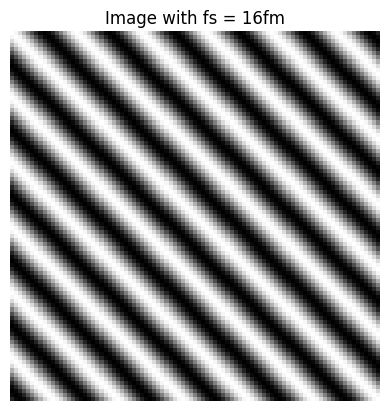

In [148]:
t = 1/(fuMax*16)
sin16 = sinusoid2d(1,45,512,64,t);
plt.imshow(sin16,cmap = 'gray')
plt.axis('off')
plt.title('Image with fs = 16fm')
plt.show()

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

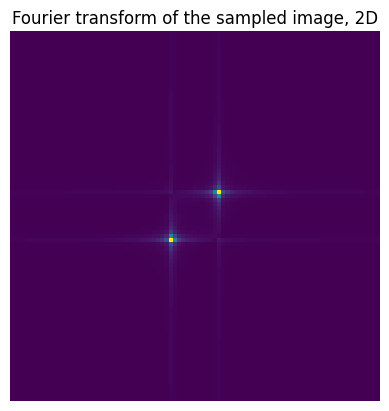

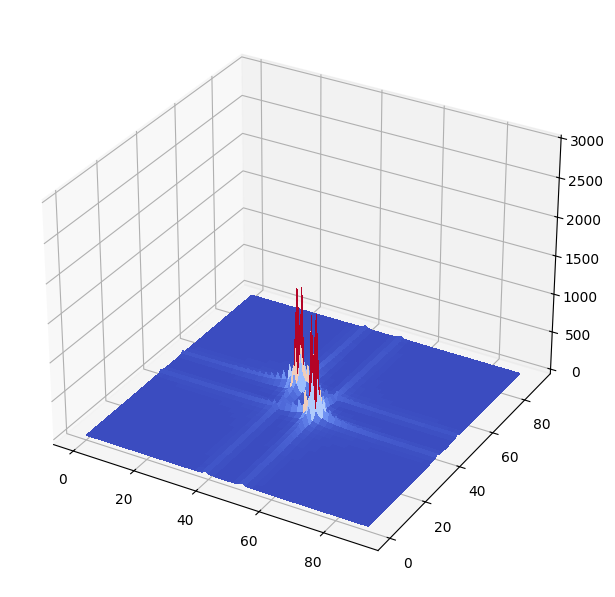

In [149]:
fourier = fft2(sin16)


def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))
fourier = toVisualizeFT(fourier)
plt.imshow(fourier)
plt.axis('off')
plt.title('Fourier transform of the sampled image, 2D')
surf(fourier)
plt.show()

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

**Answer**:
1. Verified
2. The higher the frequency, the closer we get to the continuous case.
3. We have lobes because of the sampling and windowing
4. There are two ways to obtain a single peak:
   1. If $\frac{1}{T} = f_m$. In this case, we  have a complete overlap of the 2 peaks because we are sampling at half the necessary rate, giving a single peak corresponding to freq = 0. The original signal is completely lost!
   2. If $\frac{1}{T} = 2f_m$. In this case, we have a single peak corresponding exactly to the frequency of the original signal, confirming the Shannon's theorem.

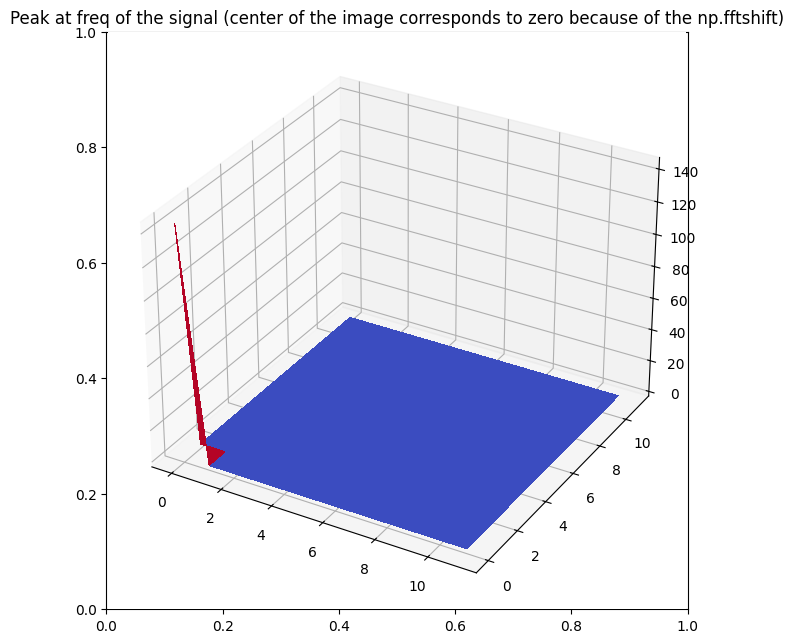

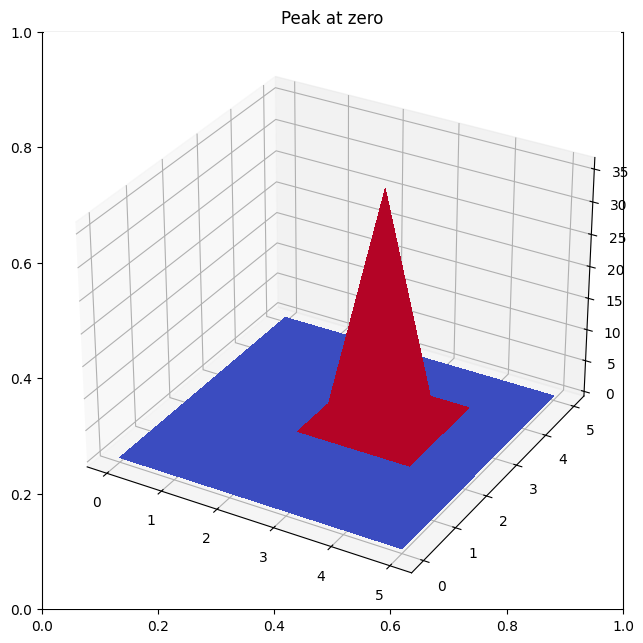

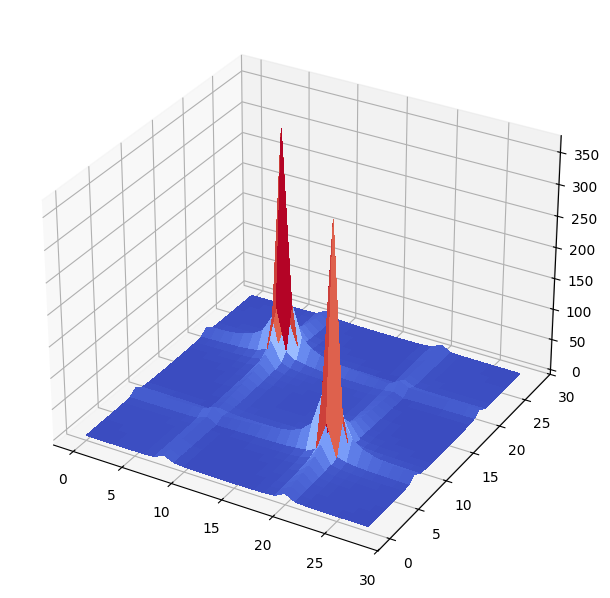

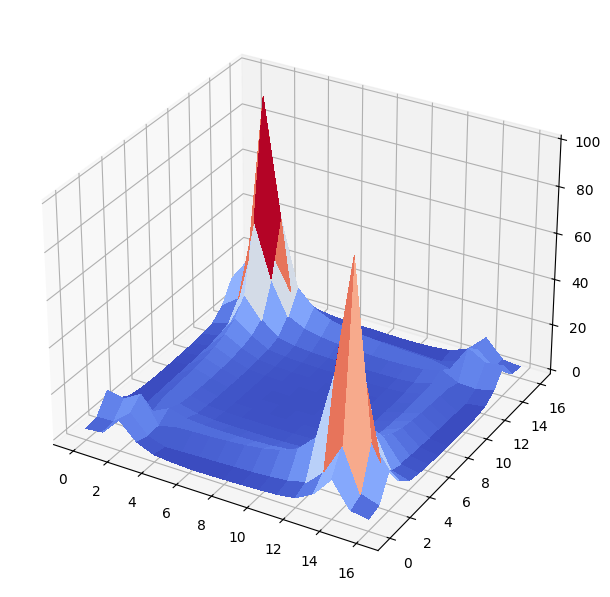

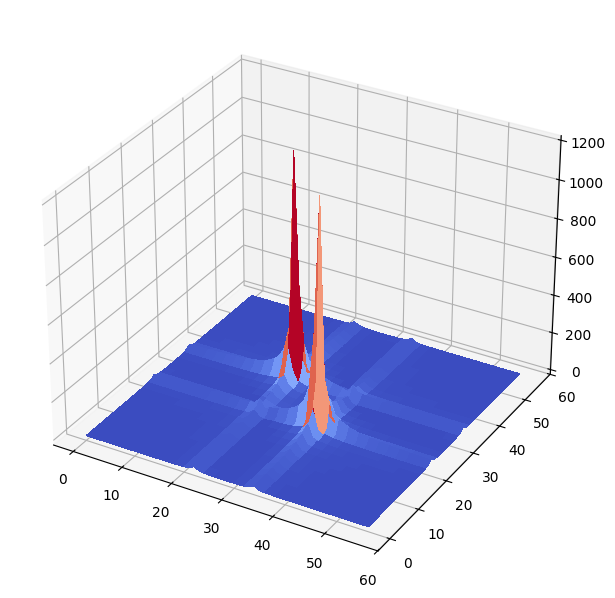

In [150]:
t = 1/(2*fuMax)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)), 'Peak at freq of the signal (center of the image corresponds to zero because of the np.fftshift)')

t = 1/(fuMax)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)), 'Peak at zero')

t = 1/(5*fuMax)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()


t = 1/(fuMax*3)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()


t = 1/(fuMax*10)
sin4 = sinusoid2d(1,45,512,64,t)
surf(toVisualizeFT(fft2(sin4)))
plt.show()

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

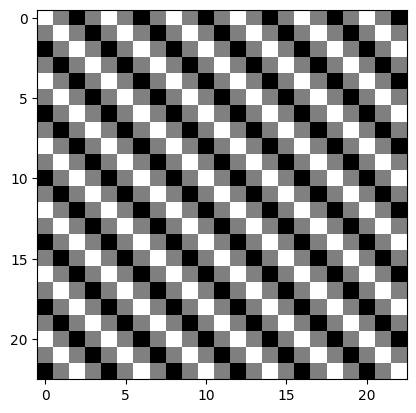

In [151]:
t = 1/(fuMax*4)
size = 512
sin4 = sinusoid2d(1,45,size,64,t)

plt.imshow(sin4,cmap='gray')
plt.show()

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [152]:
def error(xr,xd,A):
    '''Array*Array*double*double -> double'''
    assert(xr.shape == xd.shape)
    assert(xr.shape[0] == xr.shape[1])
    L = xr.shape[0]
    c = 1/(2*A*L*L)
    res = 0
    for i in range(L):
        for j in range(L):
            res += abs(xr[i][j]-xd[i][j])
    return c*res

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal. Print the relative average error between the original and reconstructed images. What is the origin of this error?

**Answer**: The origin of the error is due to the windowing. We implicitly apply a rectangular function to obtain our image from the original signal. This causes artifacts to appear near borders. However, the apparent frequency of the reconstructed signal is correct.

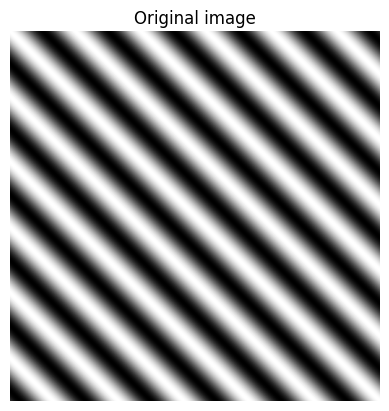

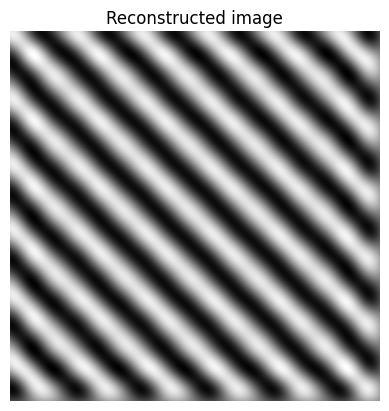

The average error is 0.022936924363102643


In [153]:
t = 1/(ftMax*4)
size = 512
original = sinusoid2d(1,45,size,64,1)
sin4 = sinusoid2d(1,45,size,64,t)
rec = shannonInterpolation(sin4,t,size)

plt.imshow(original,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

plt.imshow(rec,cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()

print(f'The average error is {error(original,rec,1)}')

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

**Answer**:
1. The frequency of the reconstructed signal is visually different from the frequency of the original signal. This is caused by the aliasing (because we sample below the Shannon's limit)
2. The calculated error is, of course, much higher than in previous case.


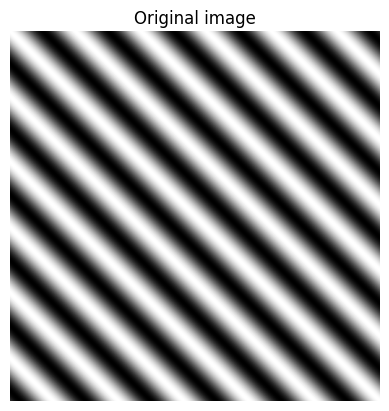

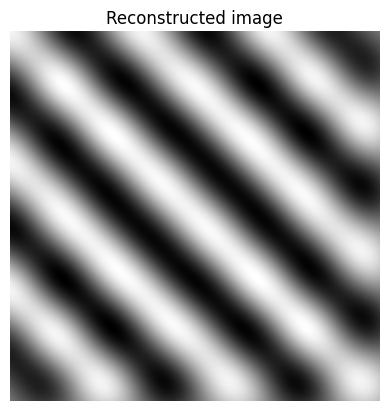

The average error is 0.406862647501468


In [154]:
t = 1/(fuMax*3/2)
original = sinusoid2d(1,45,size,64,1)
plt.imshow(original,cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

sin4 = sinusoid2d(1,45,size,64,t)
rec = shannonInterpolation(sin4,t,size)
plt.imshow(rec,cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()
print(f'The average error is {error(original,rec,1)}')

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

**Answer**:
1. $f_m = \max( f \cos \theta, f \sin \theta ) \approx 0.0153876$
2. Not only the reconstructed signal appears with a wrong frequency, but also at a wrong orientation 

 The maximum frequency is 0.01538762114081575


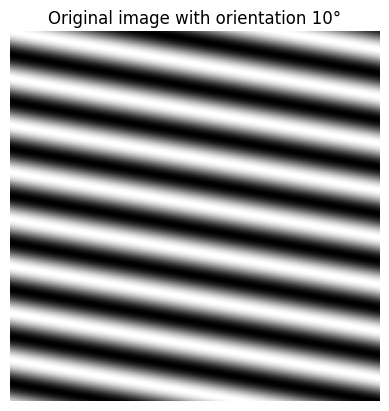

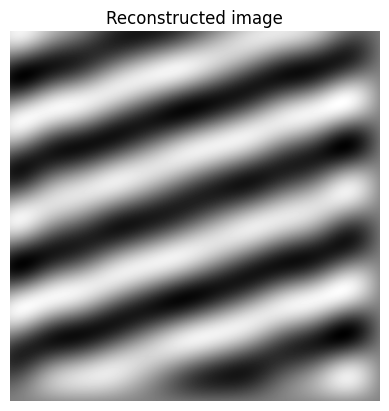

In [155]:
theta_deg = 10
theta = theta_deg * np.pi / 180
f = 1/64
sin4 = sinusoid2d(1,theta_deg,512,64,1)

tfuMax = f*math.sin(theta)
tftMax = f*math.cos(theta)
print(f' The maximum frequency is {max(tfuMax,tftMax)}')

plt.imshow(sin4,cmap='gray')
plt.axis('off')
plt.title('Original image with orientation 10°')
plt.show()

t = 1/(1.5*max(tfuMax,tftMax))
sin4 = sinusoid2d(1,theta_deg,512,64,t)
rec = shannonInterpolation(sin4,t,512)
plt.imshow(rec,cmap = 'gray')
plt.axis('off')
plt.title('Reconstructed image')
plt.show()

6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

**Answer**: Runtime of the naive function is worse, because numpy uses efficient compiled implementation written in C 

0.5229146669999523


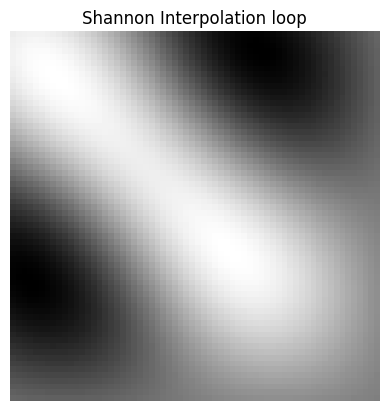

0.00042424500003335197


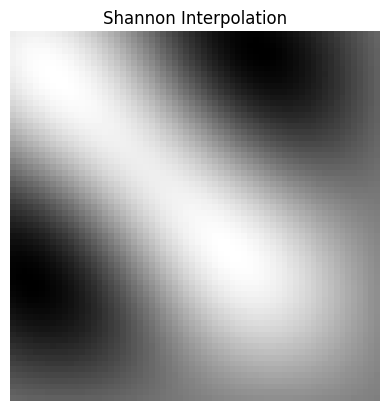

In [156]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def shannonInterpolationLoop(I, Ts, size):
    n, m = I.shape
    result = np.zeros((size, size))  
    for k in range(size): 
        for l in range(size):  
            sum_value = 0.0
            for i in range(n):
                for j in range(m):
                    sinc_x = np.sinc((l/Ts) - j)
                    sinc_y = np.sinc((k/Ts) - i)
                    sum_value += I[i, j] * sinc_x * sinc_y
            result[k, l] = sum_value
    return result

t = 1/(4*fuMax)
sin4 = sinusoid2d(1,45,64,64,t)
tic()
rec = shannonInterpolationLoop(sin4,t,64)
tac()
plt.imshow(rec,cmap = 'gray')
plt.axis('off')
plt.title('Shannon Interpolation loop')
plt.show()

tic()
rec = shannonInterpolation(sin4,t,64)
tac()

plt.imshow(rec,cmap = 'gray')
plt.axis('off')
plt.title('Shannon Interpolation')
plt.show()


## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

**Answer**: Subsample of factor 2 reduces the number of samples in an image by half in each dimension.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effe
   cts of aliasing. Why aliasing is a drawback ?

**Answer**:
1. Even after the first iteration, the effect of aliasing becomes visible (the repeated lines on the image starts to change their frequency and orientation) even though other details of the image are well-preserved.
2. Subsequent iterations degrade the quality even further.

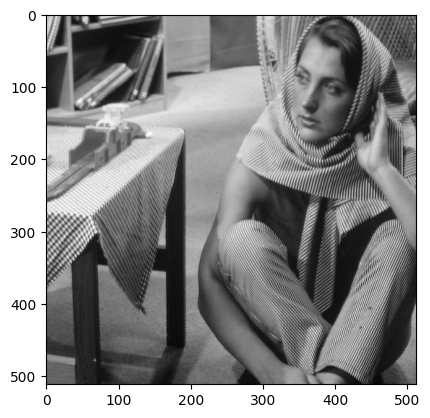

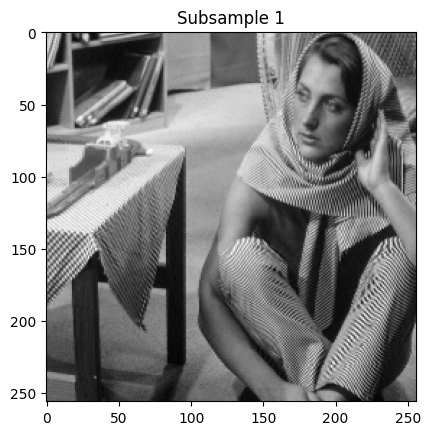

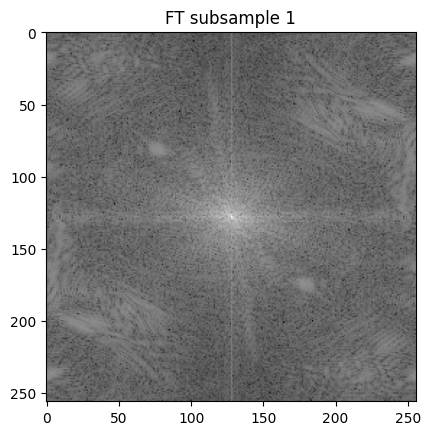

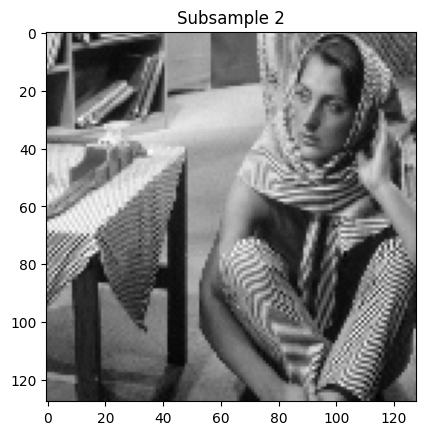

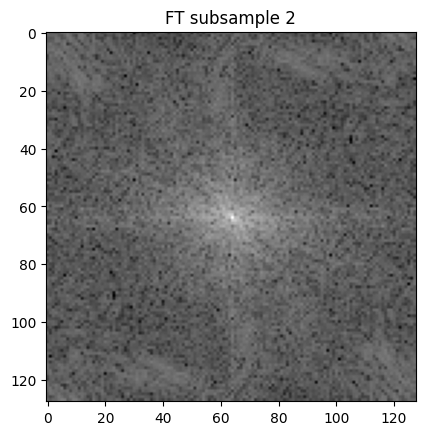

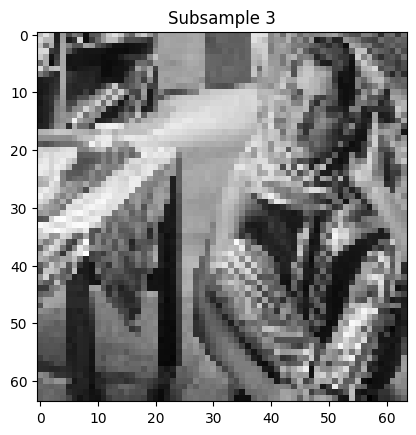

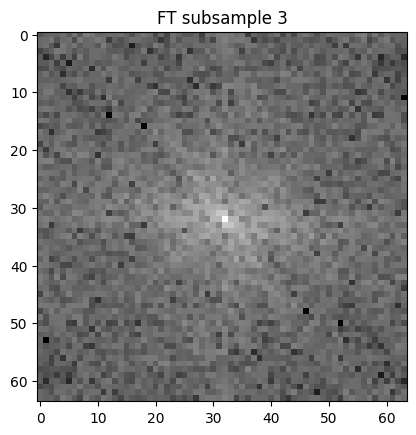

In [157]:
from PIL import Image

def subsample(image,factor):
    return image[::factor,::factor]

def iterateSubsampling(image,factor,n):
    for i in range(n):
        image = subsample(image,factor)
        plt.imshow(image,cmap='gray')
        plt.title(f'Subsample {i + 1}')
        plt.show()
        fourier = fft2(image)
        ft = np.log(1 + toVisualizeFT(fourier))
        plt.imshow(ft,cmap= 'gray')
        plt.title(f'FT subsample {i + 1}')
        plt.show()

img = np.array(Image.open('img/barbara.png'))
plt.imshow(img,cmap='gray')
plt.show()
iterateSubsampling(img,2,3)

3. Same question with the image `img/mandrill.png`.

**Answer**: For this image, the most noticeable effect of aliasing is degradation of the whiskers of the monkey, again starting from the very first iteration of subsampling, when other features are well-preserved.

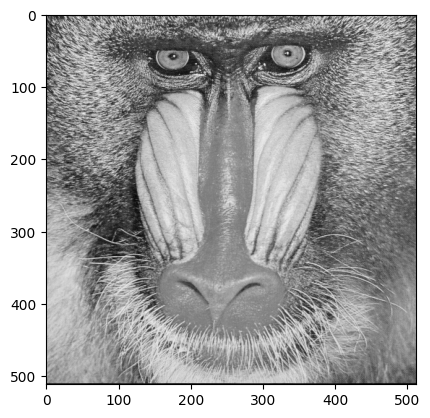

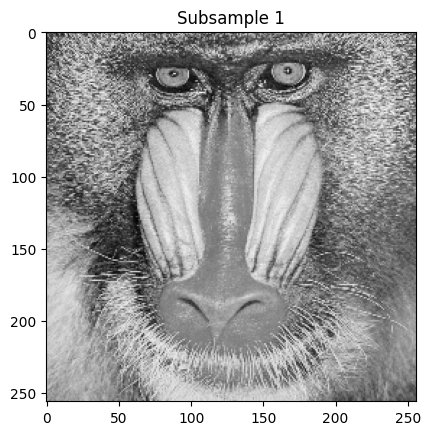

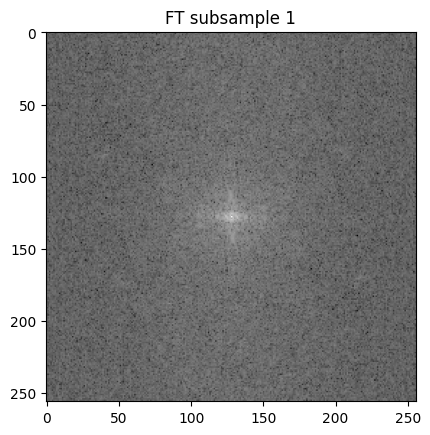

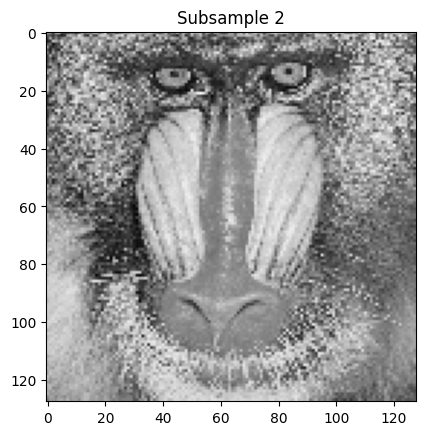

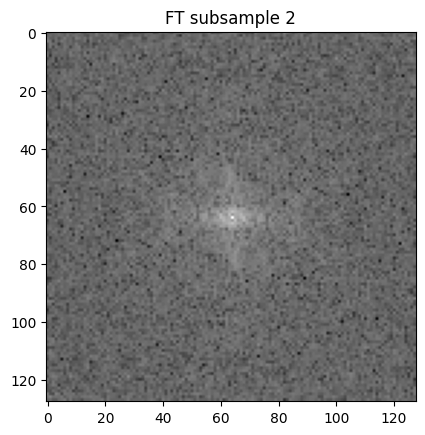

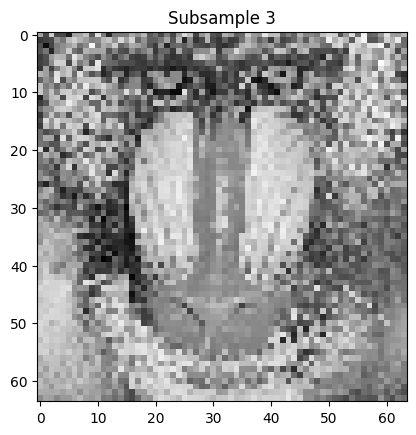

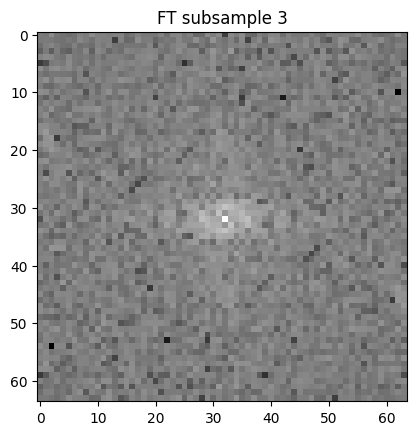

In [145]:
from PIL import Image
mandrill = np.array(Image.open('img/mandrill.png'))
plt.imshow(mandrill,cmap='gray')
plt.show()

iterateSubsampling(mandrill,2,3)